<a href="https://colab.research.google.com/github/SakshiKhatiwada/Python/blob/main/Deep-Learning/manual_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
from sklearn.datasets import make_classification
import numpy as np
X,y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0,n_informative=1, hypercube=False, random_state=37, class_sep=10)

In [74]:

import matplotlib.pyplot as plt


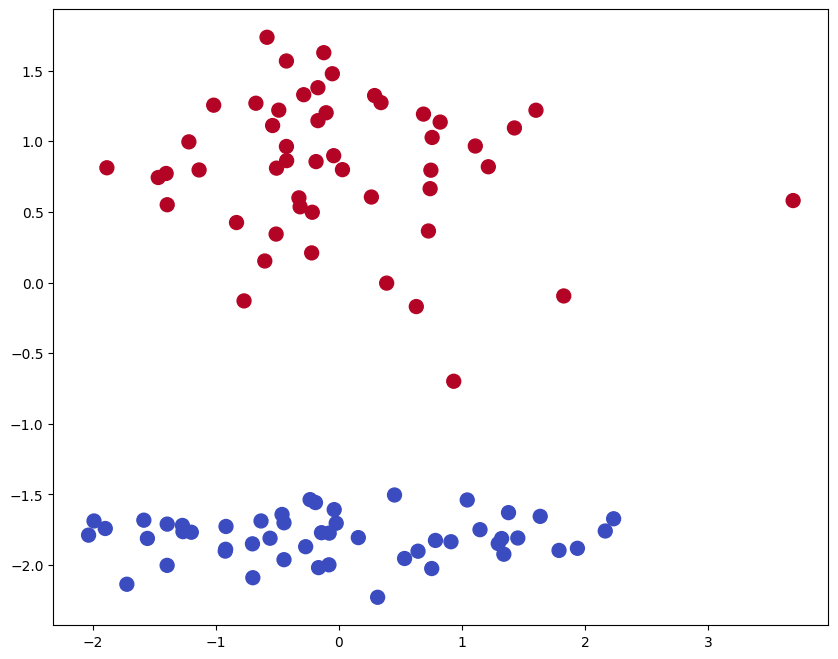

In [75]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], cmap="coolwarm", c=y, s=100)
plt.show()

The formula to modify the weights and biases in this case is
  > first add 1 and make 3D point
  > Subtract that with original A,B,C if moving the line in +ve direction, adding if moving in -ve direction

The new eqn we get is the eqn of required line

In [76]:
# X = np.insert(X, 0, 1, axis=1) # Insert on X, before 0th index, 1 there, columnwise, It returns a new array

In [77]:
def stepFunc(x):
  return 1 if x>0 else 0

In [78]:
def perceptron(X,y):
  X = np.insert(X, 0, 1, axis=1) # made it 3D
  weights = np.ones(X.shape[1]) # initializing weights with 1s, shape is same as no. of features in X
  lr = 0.1
  # print(X,"\n",y)
  for i in range(1000):
    j = np.random.randint(0,100) # choosing a random student, row, record
    y_hat = stepFunc(np.dot(X[j], weights))
    weights = weights + lr*(y[j]-y_hat)*X[j]

  return weights[0], weights[1:] # pitfall, I messed the indentation here and couldn't debug!!!

In [79]:
intercept_, coeff_ = perceptron(X,y)

In [80]:
print(intercept_, coeff_)

0.7000000000000001 [0.45614933 1.49696704]


In [81]:
# calculating m and b

m = -(coeff_[0]/coeff_[1])
b = -(intercept_/coeff_[1])

In [82]:
print("m: ", m, " b: ", b)

m:  -0.3047156833695581  b:  -0.4676121659810862


In [83]:
X_input = np.linspace(-3,3, 300)
y_input = m*X_input + b

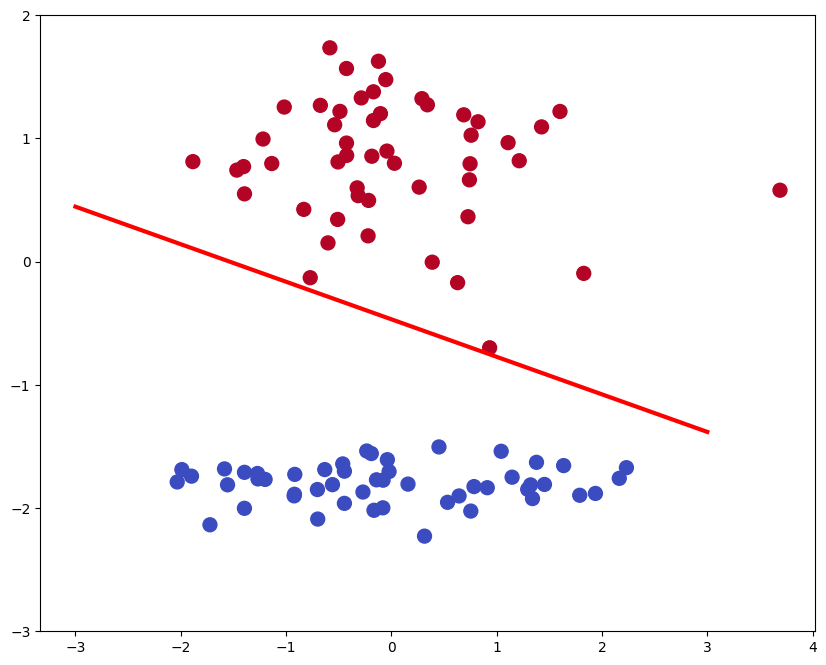

In [84]:
plt.figure(figsize=(10,8))
plt.plot(X_input, y_input,color='red', linewidth=3)
plt.scatter(X[:,0], X[:,1], cmap='coolwarm', s=100, c=y)
plt.ylim(-3,2)
plt.show()